# Statistical tools

In [1]:
import addutils.toc ; addutils.toc.js(ipy_notebook=True)

With this tutorial we are going to see some of the statistical and computational tools offered by `pandas`.

In [2]:
import datetime
import scipy.io
import numpy as np
import pandas as pd
import bokeh.plotting as bk
from IPython.display import display, HTML
from addutils import css_notebook, side_by_side2
css_notebook()

## 1 Percent change

Given a `pandas.Series` the method `pct_change` returns a new `pandas.Series` object containing percent change over a given number of periods.

In [3]:
s1 = pd.Series(range(10, 18) + np.random.randn(8) / 10)

pct_ch_1d = s1.pct_change() * 100
pct_ch_3d = s1.pct_change(periods=3) * 100

HTML(side_by_side2(s1, pct_ch_1d, pct_ch_3d))

## 2 Covariance

Given two `pandas.Series` the method `cov` computes covariance between them, excluding missing values.

In [4]:
s1 = pd.util.testing.makeTimeSeries(7)
s2 = s1 + np.random.randn(len(s1)) / 10
HTML(side_by_side2(s1, s2))

In [5]:
s1.cov(s2)

0.72459894915153866

It is also possibile to compute pairwise covariance of a `pandas.DataFrame` columns using `pandas.DataFrame.cov` method. Here we use the module `pandas.util.testing` in order to generate random data easily:

In [6]:
d1 = pd.util.testing.makeTimeDataFrame()
print (d1.head())
print (d1.cov())

                   A         B         C         D
2000-01-03 -2.238333  0.138162 -0.908553  1.562661
2000-01-04  0.292598 -0.570359  0.192452 -0.543481
2000-01-05  0.013642  1.045337  0.690139 -0.069664
2000-01-06  1.960531  1.135304 -0.878462  0.248373
2000-01-07  0.573900  0.719603 -0.726617 -0.773457
          A         B         C         D
A  0.794372  0.199038 -0.167064 -0.112771
B  0.199038  1.061793 -0.114622  0.018002
C -0.167064 -0.114622  0.762304  0.043736
D -0.112771  0.018002  0.043736  0.945614


## 3 Correlation

`pandas.Series.corr` allows to compute correlation between two `pandas.Series`. By the `method` paramether it's possible to choose between:

* Pearson
* Kendall
* Spearman

In [7]:
s1.corr(s2, method='pearson')

0.98693371660495477

Like we just seen for covariance, it is possibile to call `pandas.DataFrame.corr` to obtain pairwise correlation of columns over a `pandas.DataFrame`

In [8]:
d1.corr()

A         B         C         D
A  1.000000  0.216723 -0.214688 -0.130115
B  0.216723  1.000000 -0.127404  0.017966
C -0.214688 -0.127404  1.000000  0.051513
D -0.130115  0.017966  0.051513  1.000000

## 4 Rolling moments and Binary rolling moments

`pandas` provides also a lot of methods for calculating rolling moments.

In [9]:
[n for n in dir(pd) if n.startswith('rolling')]

['rolling_apply',
 'rolling_corr',
 'rolling_corr_pairwise',
 'rolling_count',
 'rolling_cov',
 'rolling_kurt',
 'rolling_max',
 'rolling_mean',
 'rolling_median',
 'rolling_min',
 'rolling_quantile',
 'rolling_skew',
 'rolling_std',
 'rolling_sum',
 'rolling_var',
 'rolling_window']

Let's see some examples:

In [10]:
s3 = pd.Series(np.random.randn(1000), index=pd.date_range('1/1/2000', periods=1000))
s3 = s3.cumsum()
s3_max = pd.rolling_max(s3, 60)
s3_mean = pd.rolling_mean(s3, 60)
s3_min = pd.rolling_min(s3, 60)
data = {'cumsum':s3, 'max':s3_max, 'mean':s3_mean, 'min':s3_min}
df = pd.DataFrame(data)
df.tail()

cumsum        max       mean        min
2002-09-22  16.814230  34.496269  21.763132  13.986689
2002-09-23  17.760365  34.496269  21.486842  13.986689
2002-09-24  18.308800  34.496269  21.220484  13.986689
2002-09-25  19.133714  34.496269  20.967816  13.986689
2002-09-26  19.684219  34.217841  20.720949  13.986689


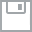
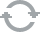
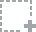
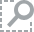
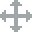
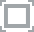
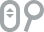
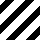
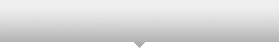
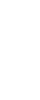
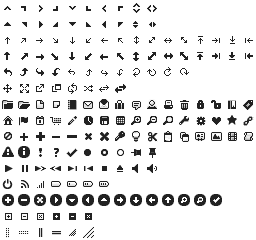
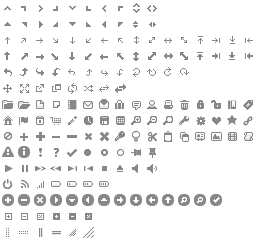
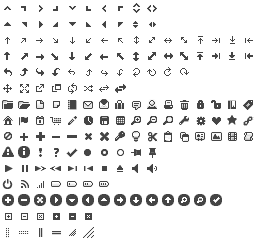
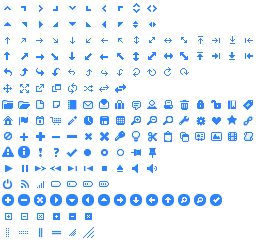
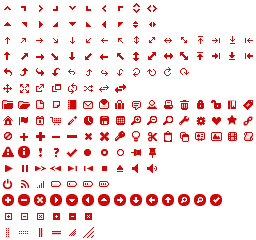
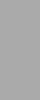
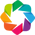
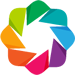

In [11]:
bk.output_notebook()

In [12]:
fig = bk.figure(x_axis_type = "datetime",
               tools="pan,box_zoom,reset", title = 'Rolling Moments',
               plot_width=750, plot_height=400)
fig.line(df.index, df['cumsum'], color='cadetblue', legend='Cumulative Sum')
fig.line(df.index, df['max'], color='mediumorchid', legend='Max')
fig.line(df.index, df['min'], color='mediumpurple', legend='Min')
fig.line(df.index, df['mean'], color='navy', legend='Min')
bk.show(fig)

`pandas.Series.cumsum` returns a new `pandas.Series` containing the cumulative sum of the given values.

In [13]:
s4 = s3 + np.random.randn(len(s3))
rollc = pd.rolling_corr(s3, s4, window=10)
data2 = {'cumsum':s3, 'similar':s4, 'rolling correlation':rollc}
df2 = pd.DataFrame(data2)

In [14]:
fig = bk.figure(x_axis_type = "datetime", title = 'Rolling Correlation',
       plot_width=750, plot_height=400)
fig.line(df2.index, df2['cumsum'], color='cadetblue', legend='Cumulative Sum')
fig.line(df2.index, df2['similar'], color='mediumorchid', legend='Similar')
fig.line(df2.index, df2['rolling correlation'], color='navy', legend='Rolling Corr.')
fig.legend.orientation = "bottom_right"
bk.show(fig)

## 5 A pratical example: Return indexes and cumulative returns

In [16]:
AAPL = pd.read_csv('example_data/p03_AAPL.txt', index_col='Date', parse_dates=True)
price = AAPL['Adj Close']
display(price.tail())

Date
2012-09-17    699.78
2012-09-18    701.91
2012-09-19    702.10
2012-09-20    698.70
2012-09-21    700.09
Name: Adj Close, dtype: float64

`pandas.Series.tail` returns the last n rows of a given `pandas.Series`.

In [17]:
price['2011-10-03'] / price['2011-3-01'] - 1
returns = price.pct_change()
ret_index = (1 + returns).cumprod()
ret_index[0] = 1
monthly_returns = ret_index.resample('BM', how='last').pct_change()

In [18]:
fig = bk.figure(x_axis_type = 'datetime', title = 'Monthly Returns',
                plot_width=750, plot_height=400)
fig.line(monthly_returns.index, monthly_returns)
bk.show(fig)

---

Visit [www.add-for.com](<http://www.add-for.com/IT>) for more tutorials and updates.

This work is licensed under a <a rel="license" href="http://creativecommons.org/licenses/by-sa/4.0/">Creative Commons Attribution-ShareAlike 4.0 International License</a>.